In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op
import scipy.integrate as integrate

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

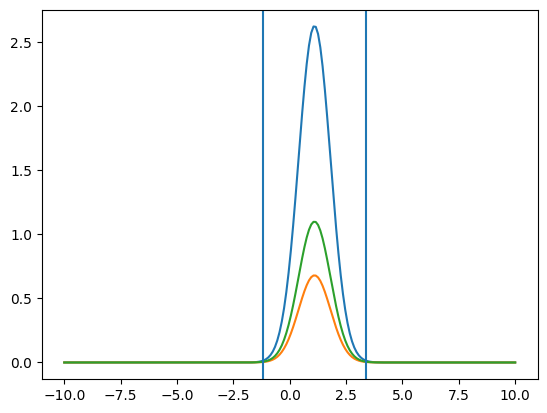

*Extracting Pieces for TH1*
Available Functions:
	Num_Xbins(TH1_) returns number of X bins for a TH1
	XEdges_1d(TH1_) returns edges of x bins for a TH1
	Center_Xbins(TH1_) returns center values for x bins for a TH1
	Values_1d(TH1_) returns the y values for a TH1
	Errors_1d(TH1_) returns the error values for TH1
	Errors2_1d(TH1_) returns the squared error values for TH1
Enjoy using TH1s

*Using Derivatives*
	ddx(xarray_,yarray_) returns an array of discretely derivatived y values keeping the x vals
	ddx2(xarray_,yarray_) returns an array of discretely 2nd order derivatived y values keeping the x vals
Enjoy using discrete derivatives


In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot or uproo4
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions-uproot3.ipynb
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to functions for taking discrete derivatives of lists of data
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Derivatives.ipynb

In [3]:
run="e16"
sim="exp"

filled_date = "08-04-2024"
empty_date = "08-05-2024"
sim_date = "08-05-2024"
#filled_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+filled_date
filled_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+filled_date
empty_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+empty_date
sim_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+sim_date

filled_rootfile = filled_dir+"/"+sim+"_"+run+"_clas6_vertex_"+filled_date+".root"
empty_rootfile = empty_dir+"/"+sim+"_empty_"+run+"_clas6_vertex_"+empty_date+".root"
#empty_rootfile = empty_dir+"/"+sim+"_empty_"+run+"_clas6_vertex_"+empty_date+".root"
sim_rootfile = sim_dir+"/sim_"+run+"_clas6_vertex_"+sim_date+".root"

filled_file = uproot3.open(filled_rootfile)
empty_file = uproot3.open(empty_rootfile)
sim_file= uproot3.open(sim_rootfile)



edge_fracs = [0.0,0.8,1.6]
gaus_fracs = [0.01,0.001,0.00001]

sector_names = ["sec1","sec2","sec3","sec4","sec5","sec6","all"]

color_order = ['b','g','r']
rv_color_order = ['r','g','b']
cut_name = ['tight','mid','loose']
rv_cut_name = ['loose','mid','tight']

Qr = 13.67


In [4]:
layer1 = "Vertex"
layer2 = "vertex_pid"
layer3 = layer2+"_cut"
layer4 = [layer3+"_mnone_"+sector_names[sec] for sec in range(6)]

hist_e = [empty_file[layer1+"/"+layer2+"/"+layer3+"/"+layer4[sec]+"/"+layer4[sec]] for sec in range(6)]
hist_f = [filled_file[layer1+"/"+layer2+"/"+layer3+"/"+layer4[sec]+"/"+layer4[sec]] for sec in range(6)]
hist_s = [sim_file[layer1+"/"+layer2+"/"+layer3+"/"+layer4[sec]+"/"+layer4[sec]] for sec in range(6)]





In [5]:
xbins = Num_Xbins(hist_e[0])
xedges = XEdges_1d(hist_e[0])
xvals = Center_Xbins(hist_e[0])
yvals_e = [Values_1d(hist_e[sec]) for sec in range(6)]
yvals_eq = [[yvals_e[sec][i] * Qr for i in range(len(yvals_e[sec]))] for sec in range(6)]
yvals_f = [Values_1d(hist_f[sec]) for sec in range(6)]
yvals_s = [Values_1d(hist_s[sec]) for sec in range(6)]
yerr_e = [Errors_1d(hist_e[sec]) for sec in range(6)]
yerr_eq = [[yerr_e[sec][i] * Qr for i in range(len(yerr_e[sec]))] for sec in range(6)]
yerr_f = [Errors_1d(hist_f[sec]) for sec in range(6)]
yerr_s = [Errors_1d(hist_s[sec]) for sec in range(6)]



In [6]:
xvals[150]

0.7925000000000013

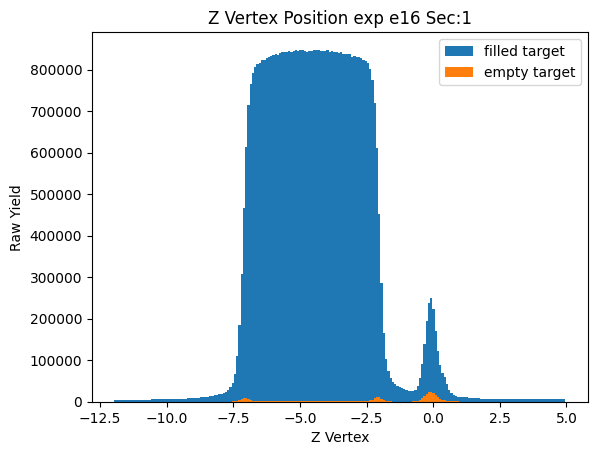

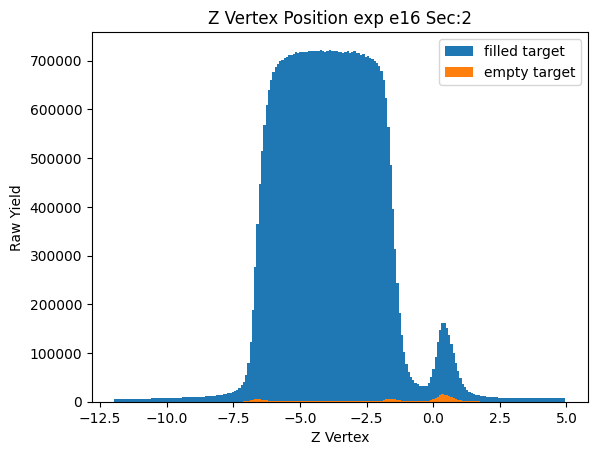

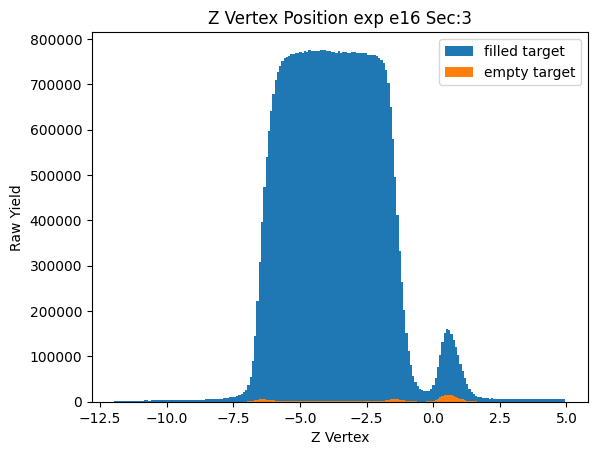

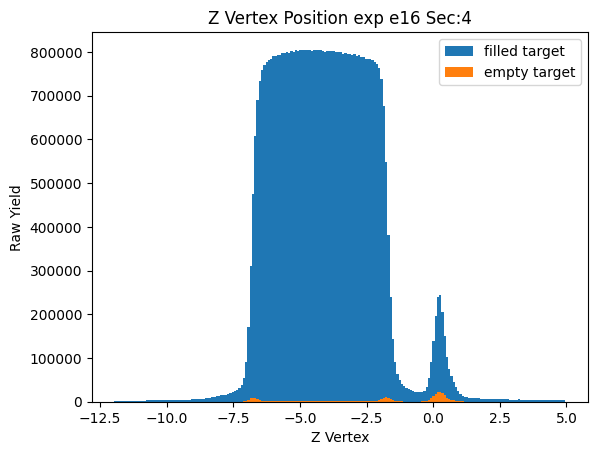

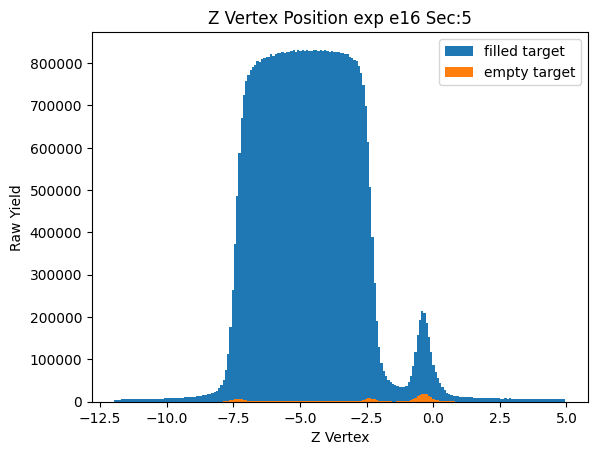

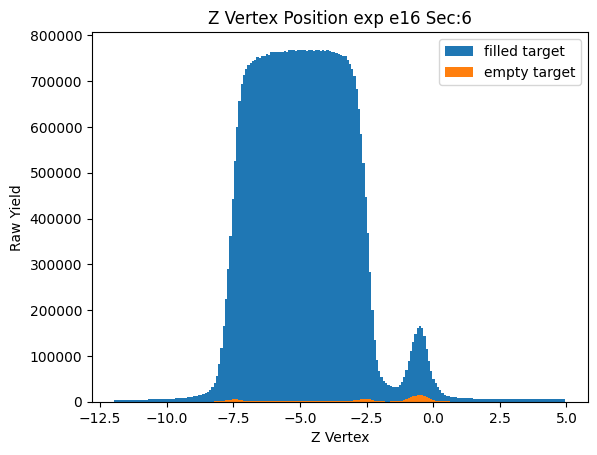

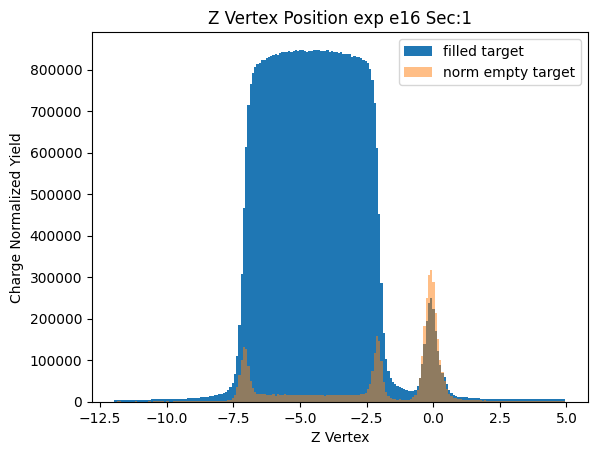

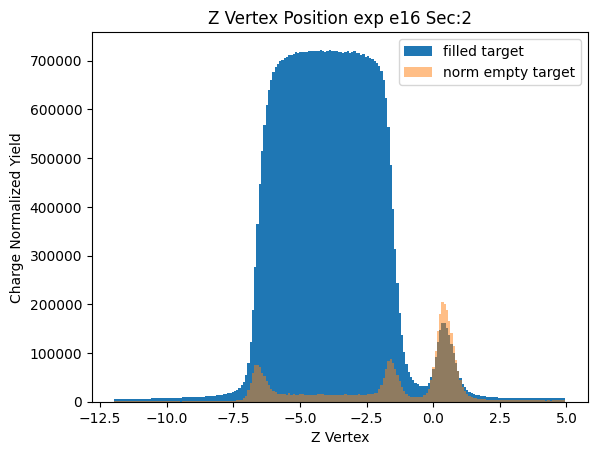

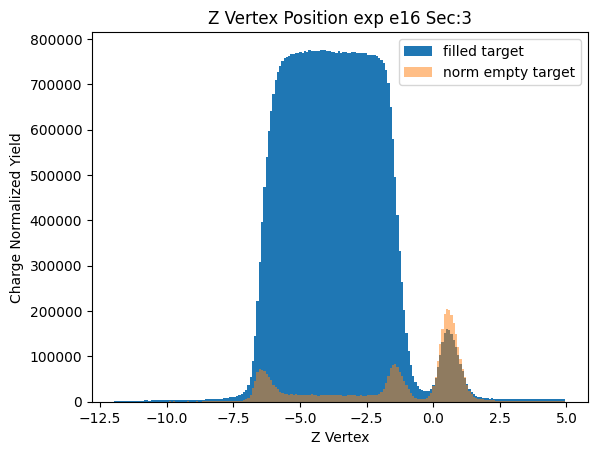

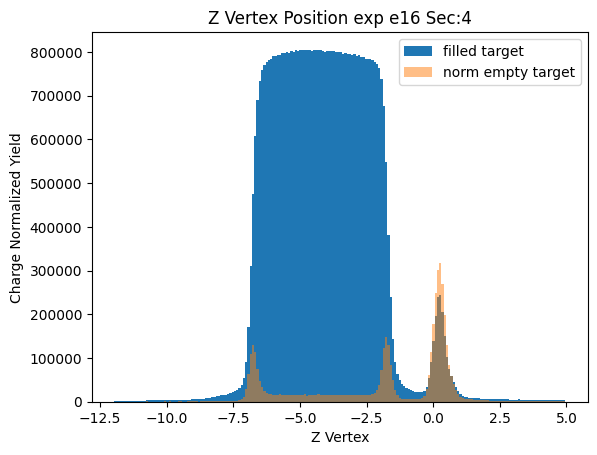

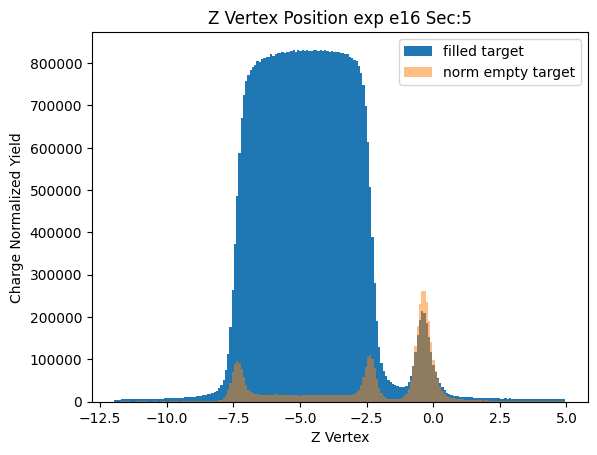

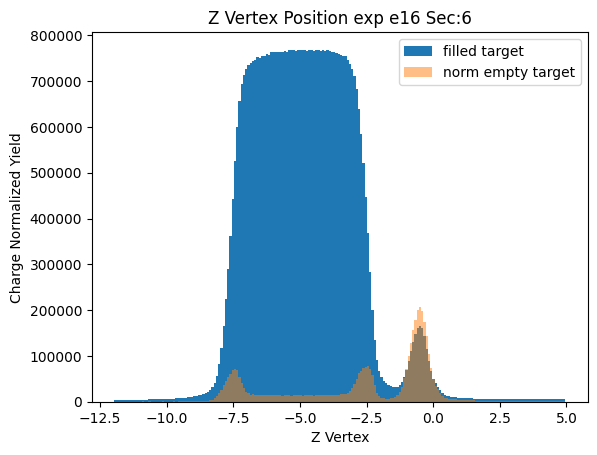

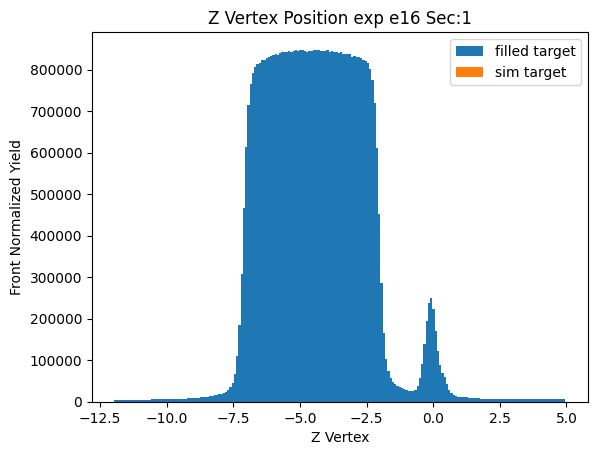

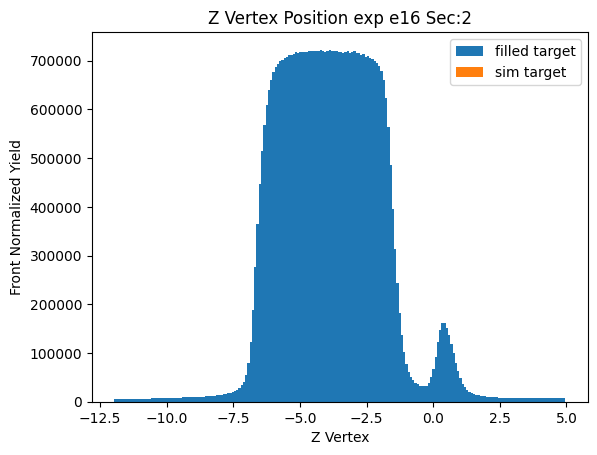

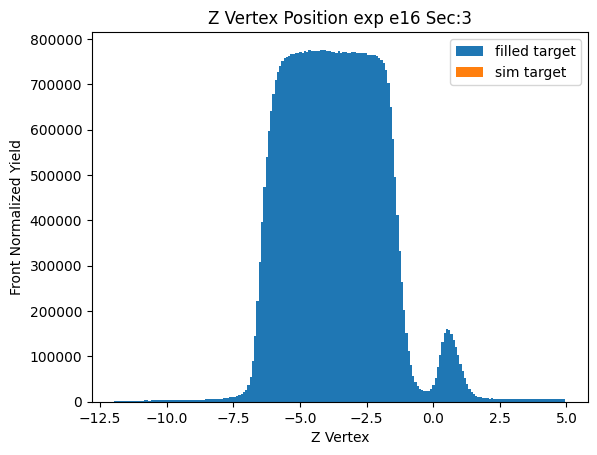

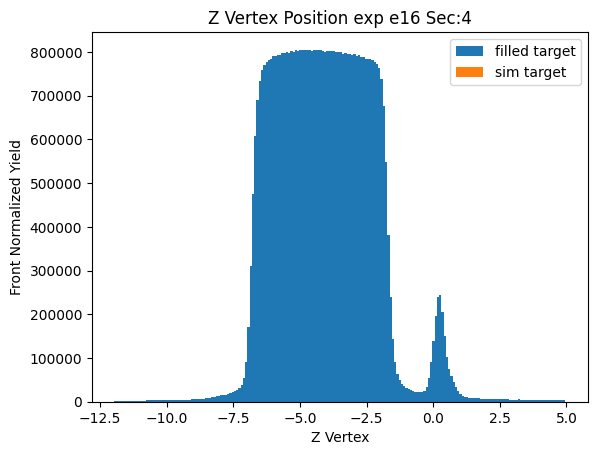

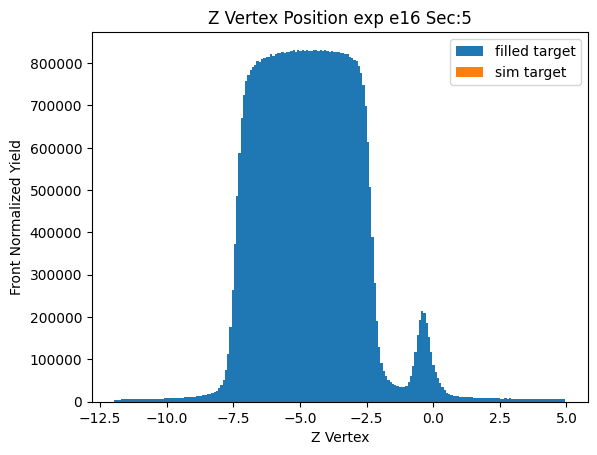

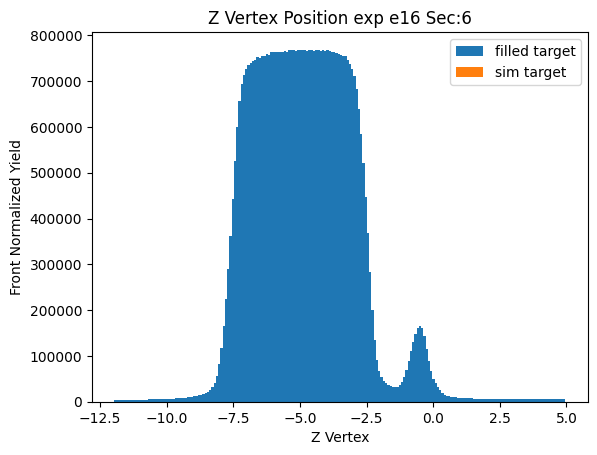

In [7]:
#Identify Initial Peak to normalize to

norm_idx = [140,145,147,143,137,136]


norm_idx2 = [100,100,100,100,100,100]


for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="filled target",bins=len(xvals))
    plt.hist(xvals,weights=yvals_e[sec],label="empty target",bins=len(xvals))
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    #plt.axvline(x=xvals[norm_idx[sec]],label="Sec{} Norm Loc".format(sec+1),color='r')
    plt.title("Z Vertex Position {} {} Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Raw Yield")
    plt.legend()
    plt.show()


for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="filled target",bins=len(xvals))
    plt.hist(xvals,weights=yvals_eq[sec],label="norm empty target",bins=len(xvals),alpha=0.5)
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    #plt.axvline(x=xvals[norm_idx[sec]],label="Sec{} Norm Loc".format(sec+1),color='r')
    plt.title("Z Vertex Position {} {} Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Charge Normalized Yield")
    plt.legend()
    plt.show()
for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="filled target",bins=len(xvals))
    plt.hist(xvals,weights=yvals_s[sec],label="sim target",bins=len(xvals))
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    #plt.axvline(x=xvals[norm_idx2[sec]],label="Sec{} Norm Loc".format(sec+1),color='r')
    plt.title("Z Vertex Position {} {} Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Front Normalized Yield")
    plt.legend()
    plt.show()


In [8]:
#yvals_eq = [[yvals_e[sec][i] * yvals_f[sec][norm_idx[sec]]/yvals_e[sec][norm_idx[sec]] for i in range(len(yvals_e[sec]))] for sec in range(6)]
#yerr_eq = [[yerr_e[sec][i] * yvals_f[sec][norm_idx[sec]]/yvals_e[sec][norm_idx[sec]] for i in range(len(yvals_e[sec]))] for sec in range(6)]
yvals_seq = [[yvals_s[sec][i] * yvals_f[sec][norm_idx2[sec]]/yvals_s[sec][norm_idx2[sec]] for i in range(len(yvals_s[sec]))] for sec in range(6)]
yerr_seq = [[yerr_s[sec][i] * yvals_f[sec][norm_idx2[sec]]/yvals_s[sec][norm_idx2[sec]] for i in range(len(yvals_s[sec]))] for sec in range(6)]



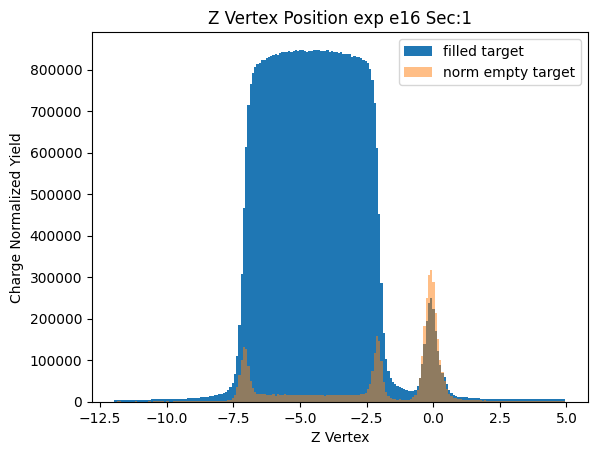

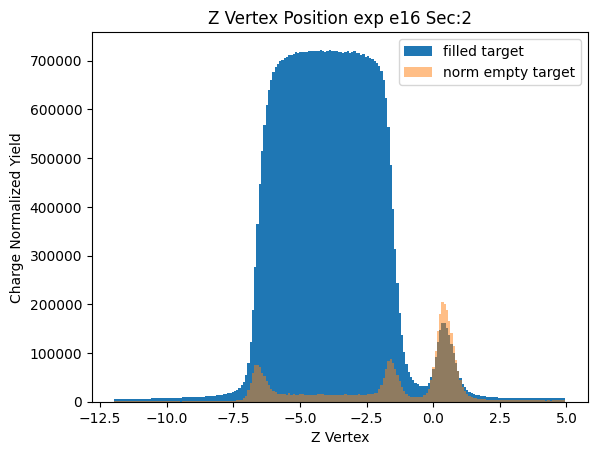

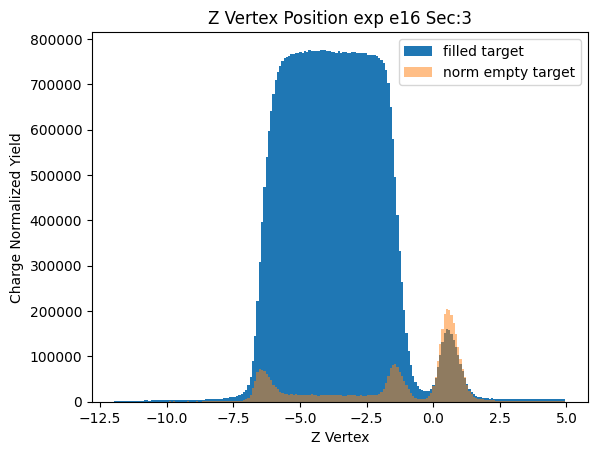

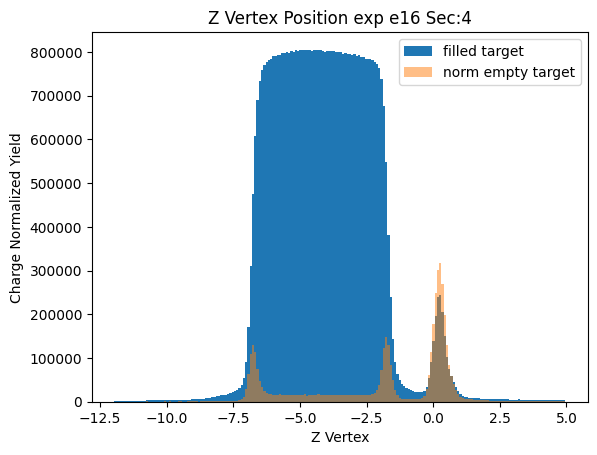

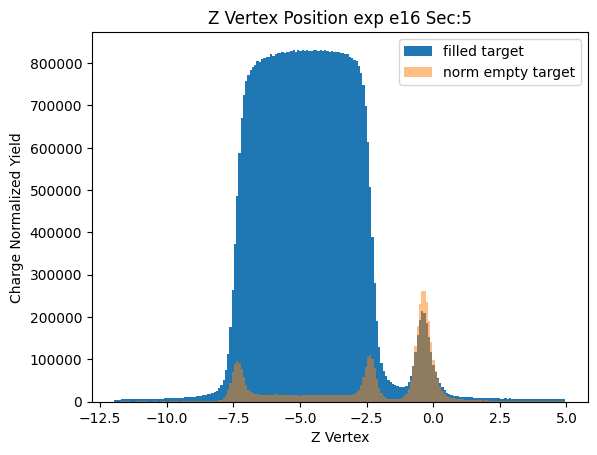

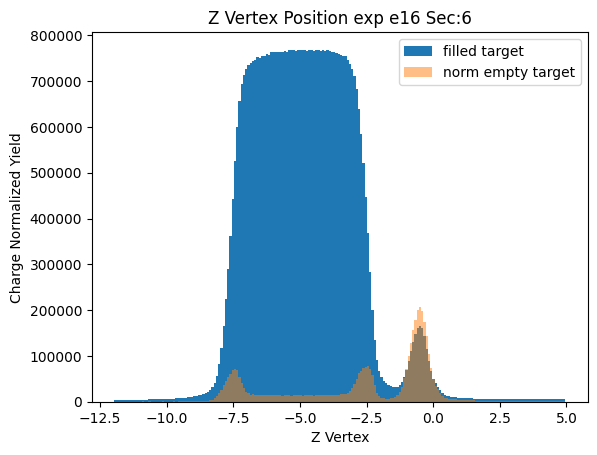

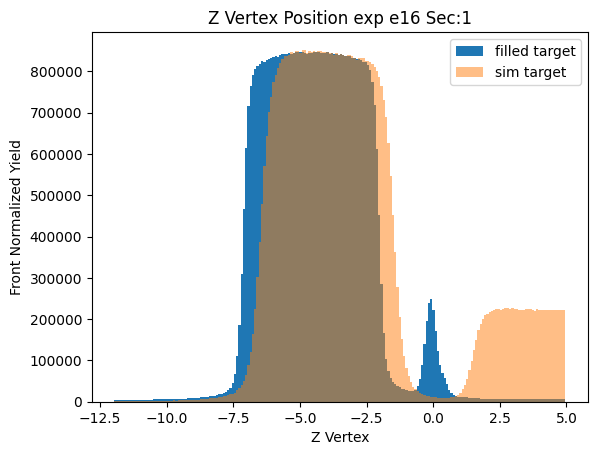

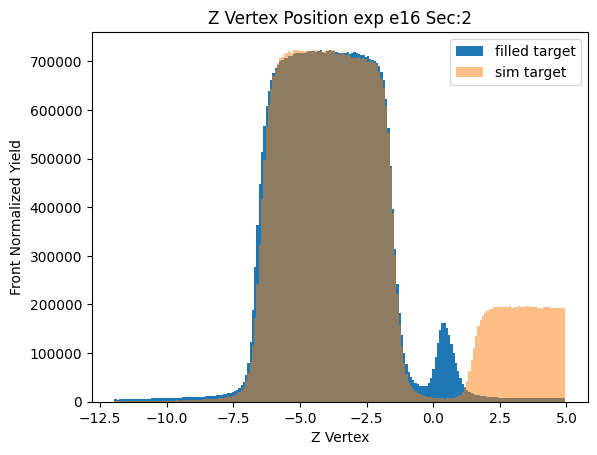

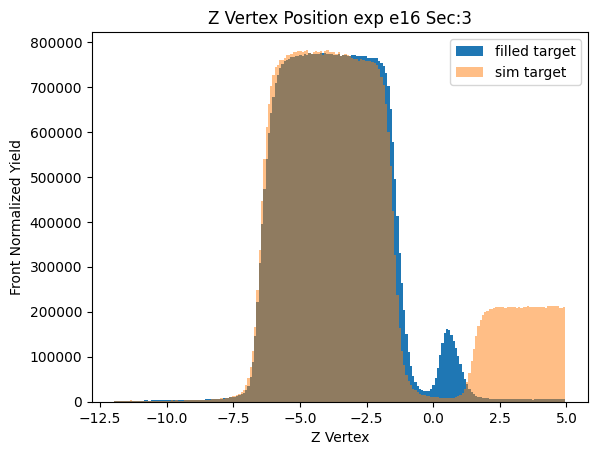

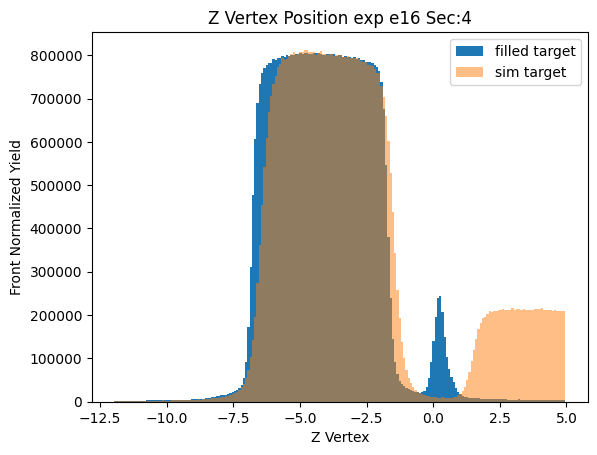

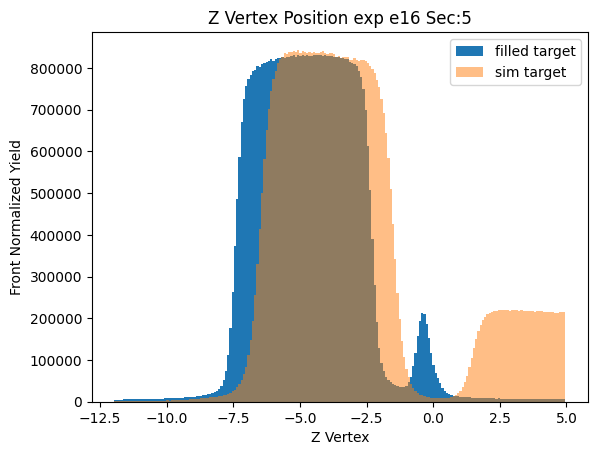

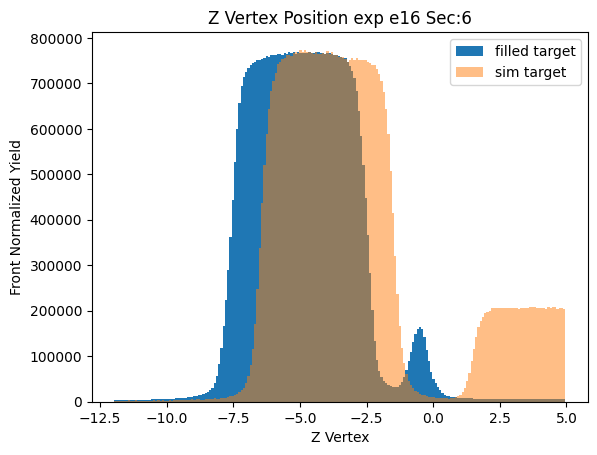

In [9]:
for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="filled target",bins=len(xvals))
    plt.hist(xvals,weights=yvals_eq[sec],label="norm empty target",bins=len(xvals),alpha=0.5)
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    #plt.axvline(x=xvals[norm_idx[sec]],label="Sec{} Norm Loc".format(sec+1),color='r')
    plt.title("Z Vertex Position {} {} Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Charge Normalized Yield")
    plt.legend()
    plt.show()
    
for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="filled target",bins=len(xvals))
    plt.hist(xvals,weights=yvals_seq[sec],label="sim target",bins=len(xvals),alpha=0.5)
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    #plt.axvline(x=xvals[norm_idx[sec]],label="Sec{} Norm Loc".format(sec+1),color='r')
    plt.title("Z Vertex Position {} {} Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Front Normalized Yield")
    plt.legend()
    plt.show()

In [10]:
yvals_sub = [[yvals_f[sec][i]-yvals_eq[sec][i] for i in range(len(yvals_e[sec]))] for sec in range(6)]



In [11]:
print([yvals_f[sec][norm_idx2[sec]]/yvals_s[sec][norm_idx2[sec]] for sec in range(6)])

[2716.06, 4004.0525, 7331.412, 3768.5051, 1757.1201, 5582.5083]


In [12]:
def super_gaus_cut_bound(frac_,side_,a_,m_,s_,p_):
    if side_ == 0:
        return 0.5*(2*m_ - 2 * (math.log(1./frac_)**(1./p_))*(2**(p_/2.)*(1./s_)**(-p_))**(1./p_))
    elif side_ ==1:
        return 0.5*(2*m_ + 2 * (math.log(1./frac_)**(1./p_))*(2**(p_/2.)*(1./s_)**(-p_))**(1./p_))
    else:
        return -99.9
    

def Sup_Gaus_Cutoff(x_,frac_,a_,m_,s_,p_):
    if x < super_gaus_cut_bound(frac_,0,a_,m_,s_,p_):
        return 0.
    elif x > super_gaus_cut_bound(frac_,1,a_,m_,s_,p_):
        return 0.
    else:
        return Super_Gaus(x_,a_,m_,s_,p_)
    
def Sup_Gaus_Cutoff_Array(x_,frac_,a_,m_,s_,p_):
    output = np.zeros(len(x_))
    for i in range(len(x_)):
        output[i] = Sup_Gaus_Cutoff(x_[i],frac_,a_,m_,s_,p_)
    return output

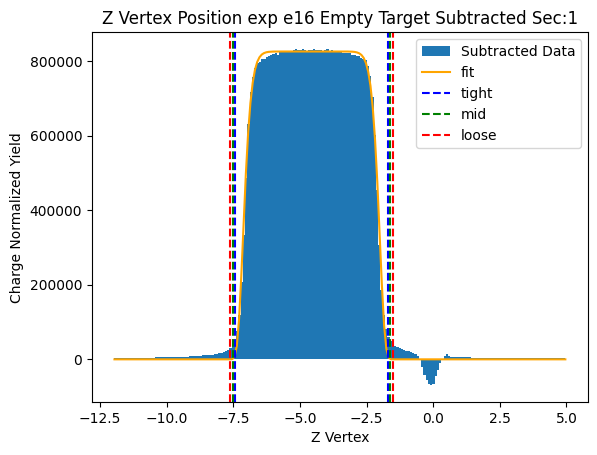

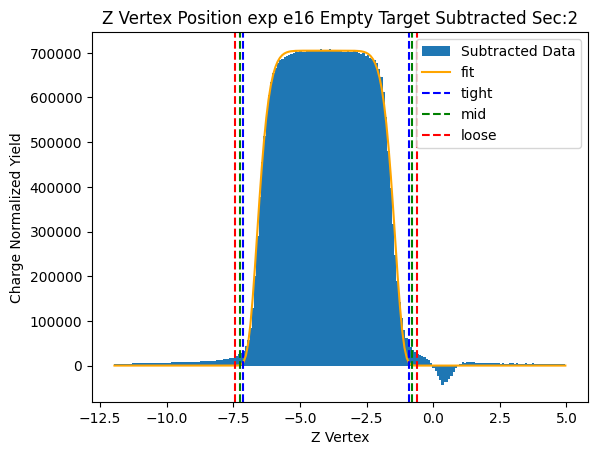

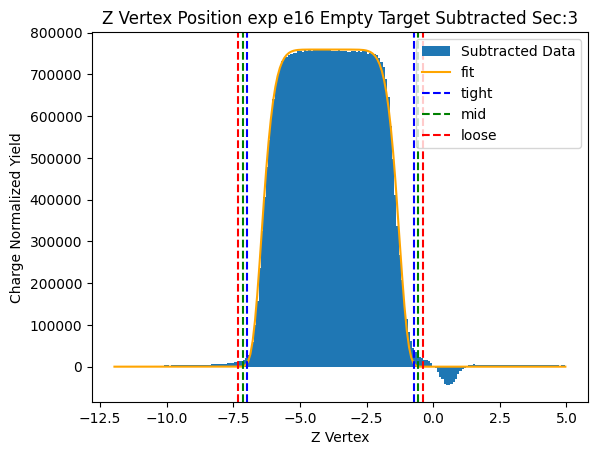

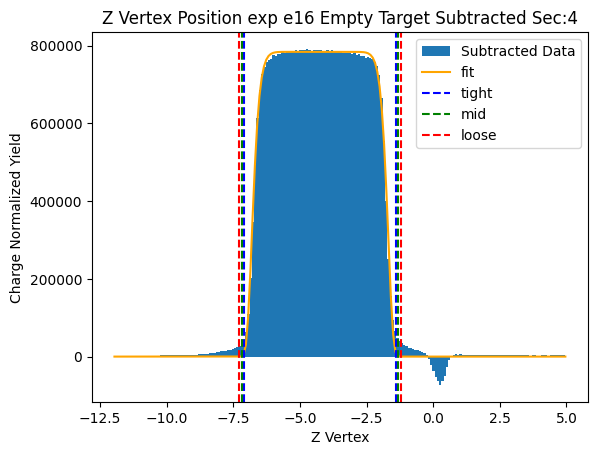

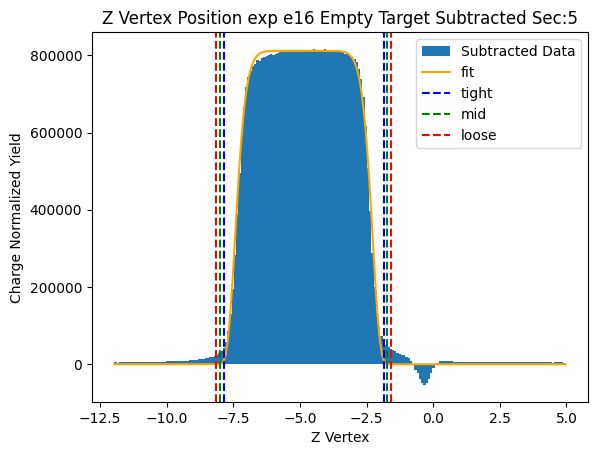

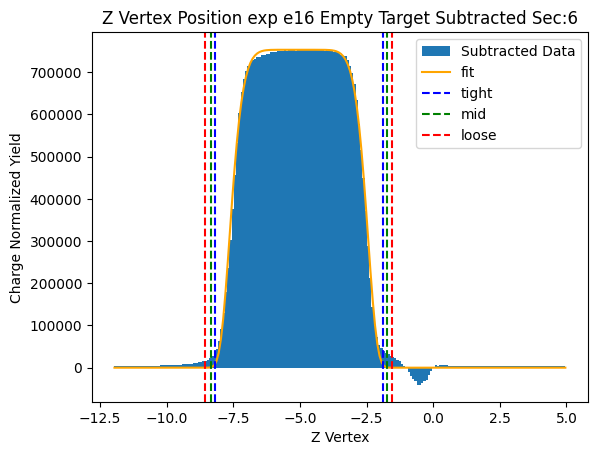

In [13]:
ini_pars = [600000,-5.0,5.0,10.0]

cut_edges = np.zeros((6,2,3))

fit_pars = np.zeros((6,4))

for sec in range(6):
    plt.hist(xvals,weights=yvals_sub[sec],label="Subtracted Data",bins=len(xvals))
    #plt.scatter(xvals,yvals_sub[sec],label="Subtracted Data")
    #plt.scatter(xvals,yvals_f,label="filled target")
    try:
        pars, pars_cov = op.curve_fit(Super_Gaus,xvals,yvals_sub[sec],p0=ini_pars,maxfev=5000)
        cont_x = np.linspace(xvals[0],xvals[xbins-1],200)
        plt.plot(cont_x,Super_Gaus(cont_x,*pars),label="fit",color='orange')
        for i in range(4):
            fit_pars[sec][i] = pars[i]
        for j in range(2):
            for k in range(3):
                cut_edges[sec][j][k] = super_gaus_cut_bound(gaus_fracs[k],j,*pars)
                if j == 0:
                    plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed",label=cut_name[k])
                else:
                    plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed")
    except RuntimeError:
        print("Runtime Error")
    except ValueError:
        print("Value Error") 
    plt.title("Z Vertex Position {} {} Empty Target Subtracted Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Charge Normalized Yield")
    plt.legend()
    plt.show()
    
    
    

[ 8.45655495e+05 -3.97945166e+00  1.86634081e+00  8.33783809e+00]


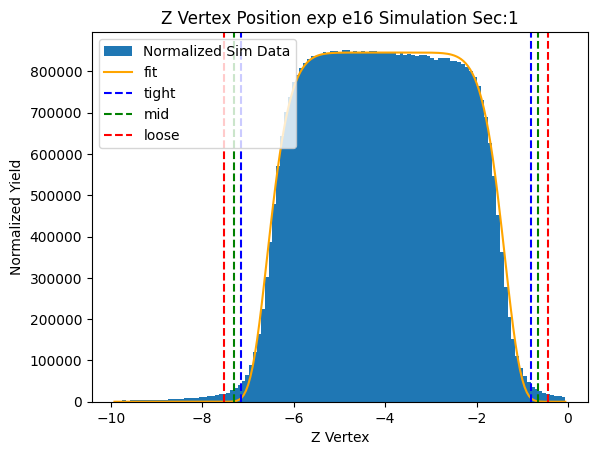

[ 7.19007485e+05 -3.97741121e+00  1.85479631e+00  9.51573659e+00]


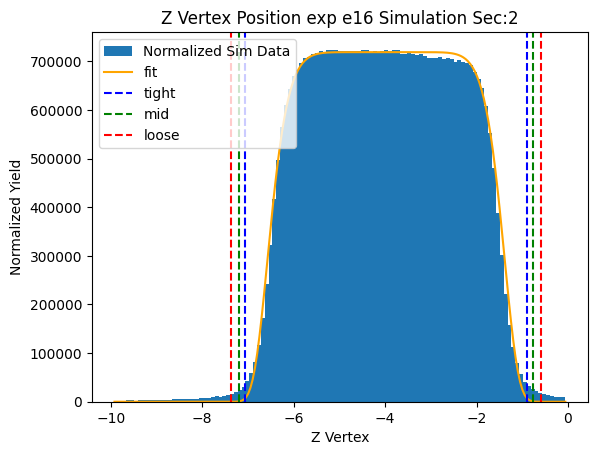

[ 7.74218478e+05 -3.97226328e+00  1.84911355e+00  1.00480952e+01]


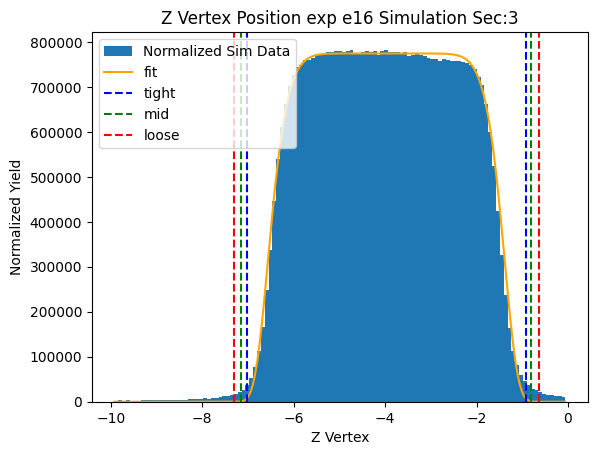

[ 8.02157006e+05 -3.97403687e+00  1.86059192e+00  8.70797044e+00]


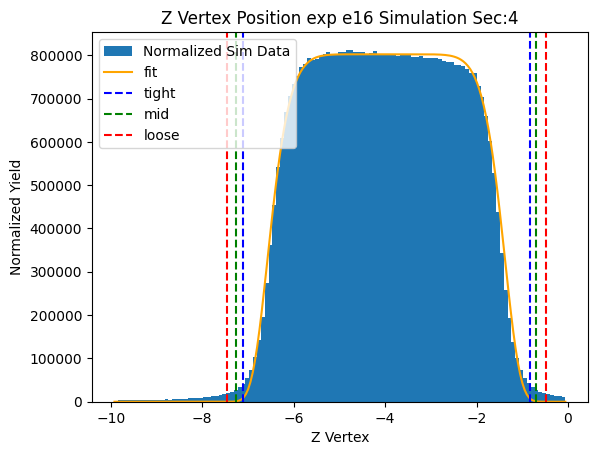

[ 8.35685031e+05 -4.01106092e+00  1.87401106e+00  7.82420066e+00]


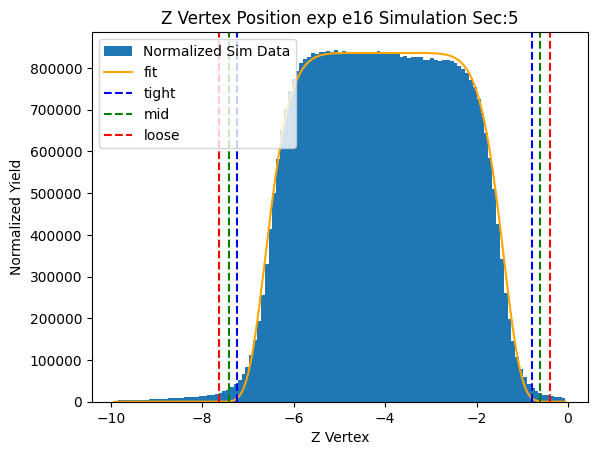

[ 7.63515627e+05 -3.97279869e+00  1.85105281e+00  9.53730871e+00]


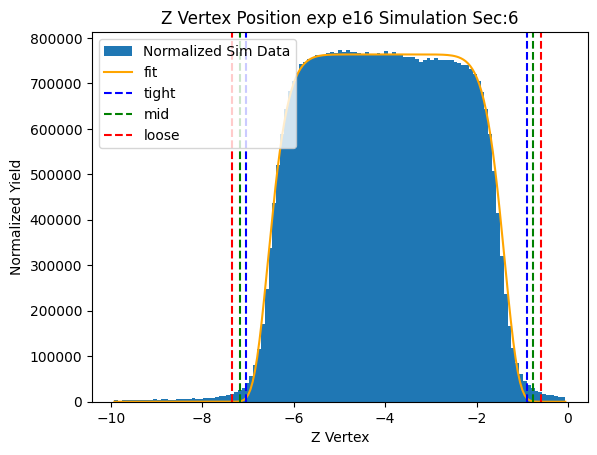

In [14]:
ini_pars = [618124.9, -3.9714,  1.855, 9.5022]

cut_edges_s = np.zeros((6,2,3))

fit_pars_s = np.zeros((6,4))

for sec in range(6):
    xvals_fit_s = Bounds_on_Y(xvals,-10,0.0)
    yvals_fit_s = Bounds_on_X_From_Y(yvals_seq[sec],xvals,-10,0.0)
    plt.hist(xvals_fit_s,weights=yvals_fit_s,label="Normalized Sim Data",bins=len(xvals_fit_s))
    #plt.scatter(xvals,yvals_sub[sec],label="Subtracted Data")
    #plt.scatter(xvals,yvals_f,label="filled target")
    try:
        pars, pars_cov = op.curve_fit(Super_Gaus,xvals_fit_s,yvals_fit_s,p0=ini_pars,maxfev=5000)
        cont_x = np.linspace(xvals_fit_s[0],xvals_fit_s[len(xvals_fit_s)-1],200)
        plt.plot(cont_x,Super_Gaus(cont_x,*pars),label="fit",color='orange')
        print(pars)
        for i in range(4):
            fit_pars_s[sec][i] = pars[i]
        for j in range(2):
            for k in range(3):
                cut_edges_s[sec][j][k] = super_gaus_cut_bound(gaus_fracs[k],j,*pars)
                if j == 0:
                    plt.axvline(x=cut_edges_s[sec][j][k],color=color_order[k],linestyle="dashed",label=cut_name[k])
                else:
                    plt.axvline(x=cut_edges_s[sec][j][k],color=color_order[k],linestyle="dashed")
    except RuntimeError:
        print("Runtime Error")
    except ValueError:
        print("Value Error") 
    plt.title("Z Vertex Position {} {} Simulation Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Normalized Yield")
    plt.legend()
    plt.show()

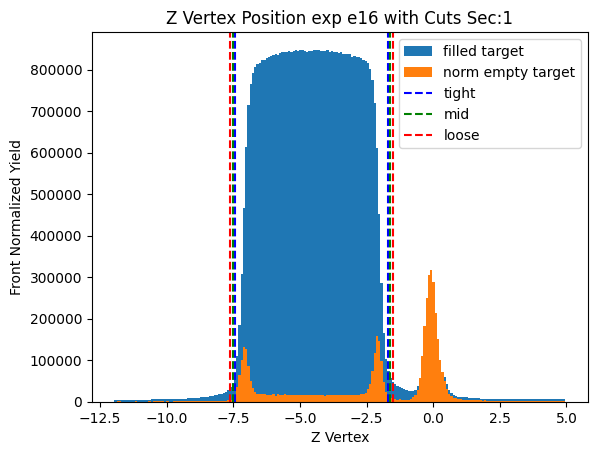

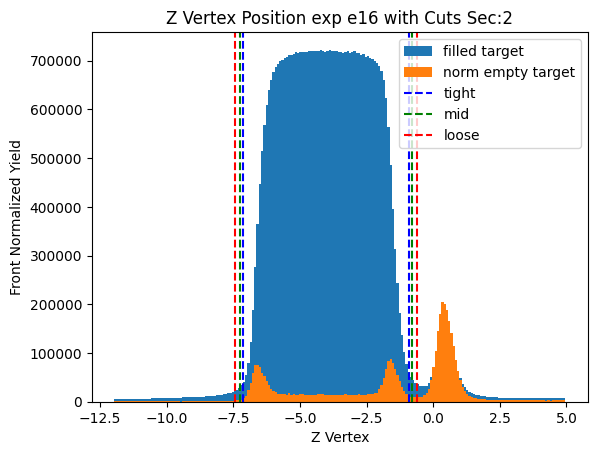

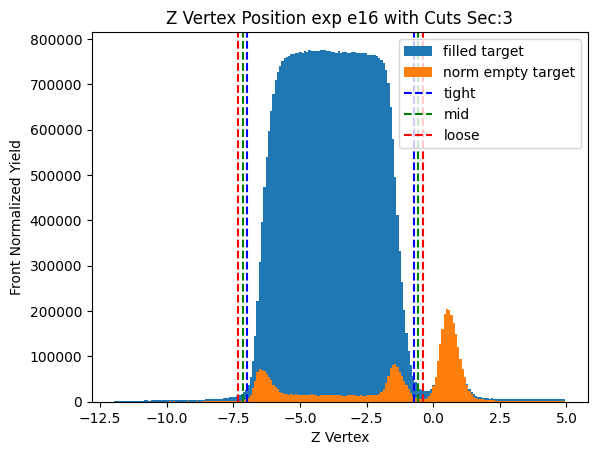

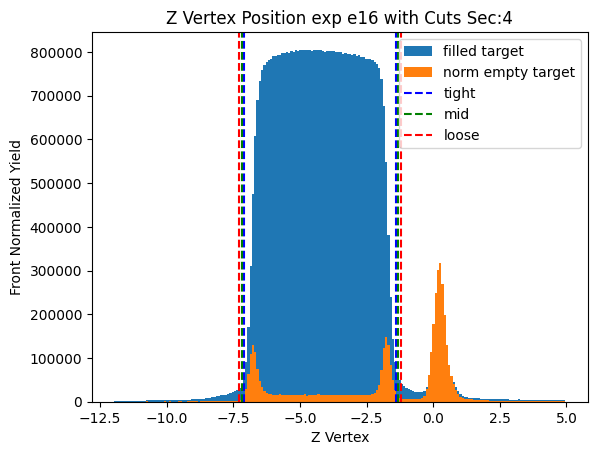

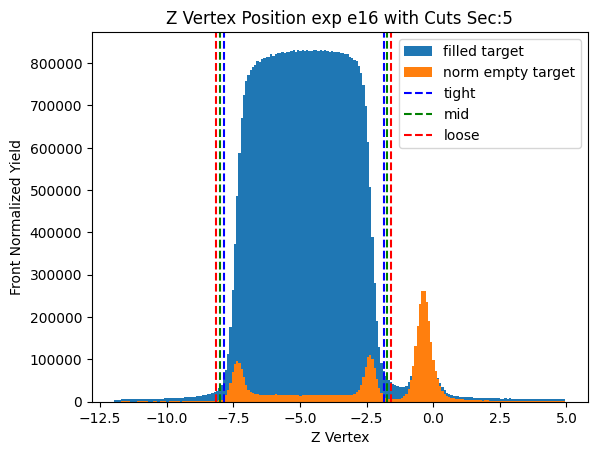

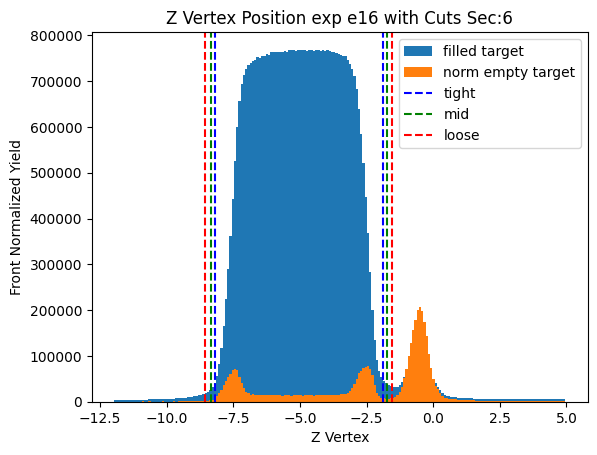

In [15]:


for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="filled target",bins=len(xvals))
    plt.hist(xvals,weights=yvals_eq[sec],label="norm empty target",bins=len(xvals))
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    for j in range(2):
        for k in range(3):
            if j == 0:
                plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed",label=cut_name[k])
            else:
                plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed")
    plt.title("Z Vertex Position {} {} with Cuts Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Front Normalized Yield")
    plt.legend()
    plt.show()

In [16]:
space = 1.0
space2= 1.75

int_range = [[cut_edges[sec][0][2]-space,cut_edges[sec][1][2]+space] for sec in range(6)]
int_range_s = [[cut_edges_s[sec][0][2]+space2,cut_edges_s[sec][1][2]-space2] for sec in range(6)]

def integrate_array(xvals_, yvals_, xmin_, xmax_):
    the_integral = 0.0
    for i in range(len(xvals_)):
        if xvals_[i] >= xmin_ or xvals[i] <= xmax_:
            the_integral += yvals_[i]
    return the_integral



[-4.569950590843519, -4.022218674552653, -3.8571272912806904, -4.245037950543903, -4.852361251658634, -5.042567011371421]
[[-6.369950590843519, -2.7699505908435196], [-5.822218674552653, -2.2222186745526535], [-5.65712729128069, -2.0571272912806906], [-6.045037950543903, -2.4450379505439033], [-6.6523612516586335, -3.052361251658634], [-6.842567011371421, -3.2425670113714213]]


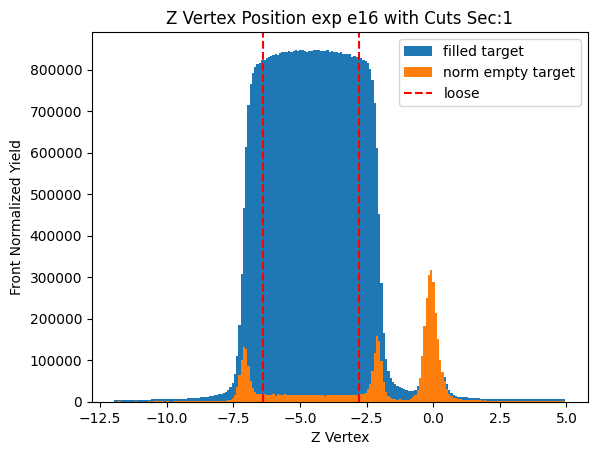

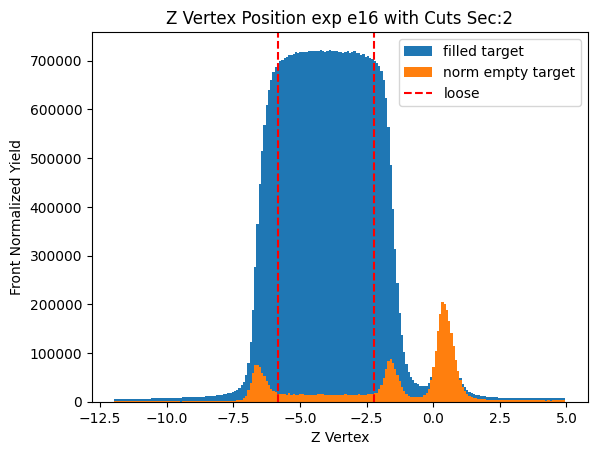

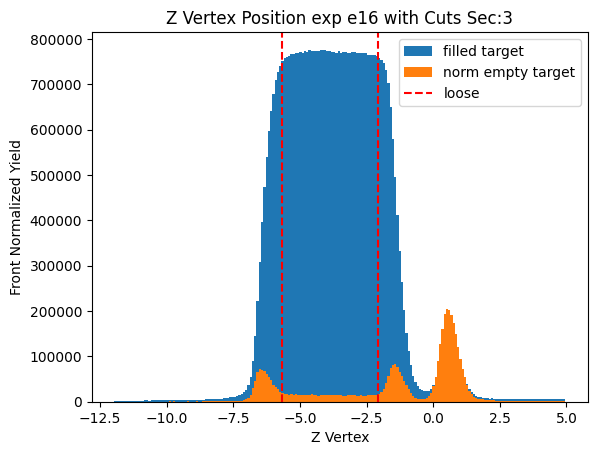

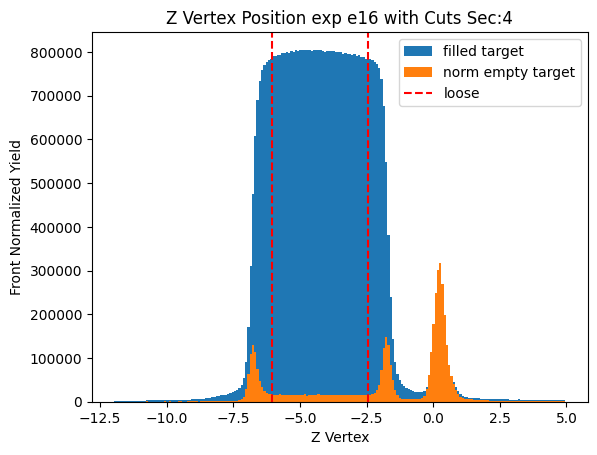

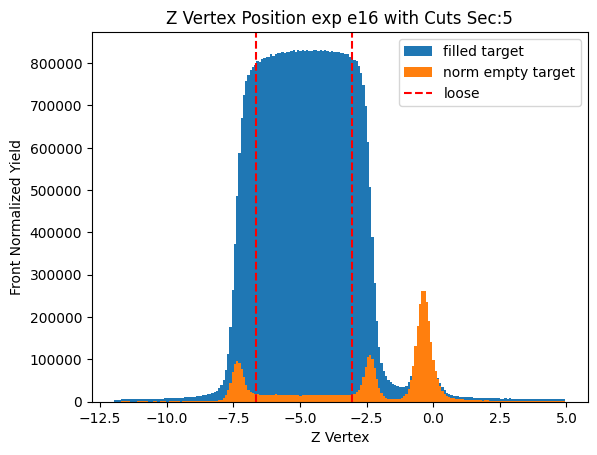

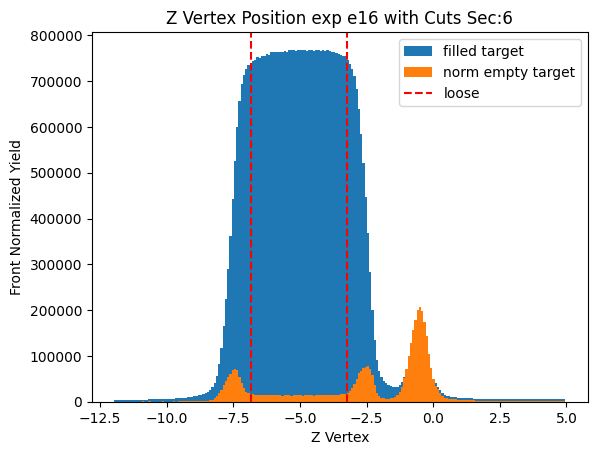

[155.9877021153289, 152.81484288134695, 156.77758838343382, 155.63327683373822, 157.88951796643485, 159.30029831497632]


In [17]:
#Luminosity Correction Factor
x_cen = [(cut_edges[sec][0][2]+cut_edges[sec][1][2])/2 for sec in range(6)]
print(x_cen)
cell_width = 1.8
x_int_bou = [[x_cen[sec]-cell_width,x_cen[sec]+cell_width] for sec in range(6)]
print(x_int_bou)

for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="filled target",bins=len(xvals))
    plt.hist(xvals,weights=yvals_eq[sec],label="norm empty target",bins=len(xvals))
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    for j in range(2):
        if j == 0:
            plt.axvline(x=x_int_bou[sec][j],color=color_order[k],linestyle="dashed",label=cut_name[k])
        else:
            plt.axvline(x=x_int_bou[sec][j],color=color_order[k],linestyle="dashed")
    plt.title("Z Vertex Position {} {} with Cuts Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Front Normalized Yield")
    plt.legend()
    plt.show()
    
L_corr = [integrate_array(xvals,yvals_f[sec],x_int_bou[sec][0],x_int_bou[sec][1])/integrate_array(xvals,yvals_e[sec],x_int_bou[sec][0],x_int_bou[sec][1]) for sec in range(6)]
print(L_corr)


In [18]:
print(int_range_s)

sim_exp_norm = [integrate_array(xvals,yvals_f[sec],int_range_s[sec][0],int_range_s[sec][1])/integrate_array(xvals,yvals_s[sec],int_range_s[sec][0],int_range_s[sec][1]) for sec in range(6)]

yvals_sq = [[yvals_s[sec][i] * sim_exp_norm[sec] for i in range(len(yvals_s[sec]))] for sec in range(6)]
yerr_sq = [[yerr_s[sec][i] * sim_exp_norm[sec] for i in range(len(yvals_s[sec]))] for sec in range(6)]



[[-5.767627680760852, -2.1912756462162184], [-5.618430406142449, -2.3363920110465344], [-5.557212394709124, -2.387314174876098], [-5.707649466291195, -2.240424279728604], [-5.88278855875817, -2.1393332730705445], [-5.605008889441303, -2.340588495790545]]


In [19]:
int_sim = [integrate_array(xvals,yvals_s[sec],int_range_s[sec][0],int_range_s[sec][1]) for sec in range(6)]
int_exp = [integrate_array(xvals,yvals_f[sec],int_range_s[sec][0],int_range_s[sec][1]) for sec in range(6)]




[-5.767627680760852, -2.1912756462162184]


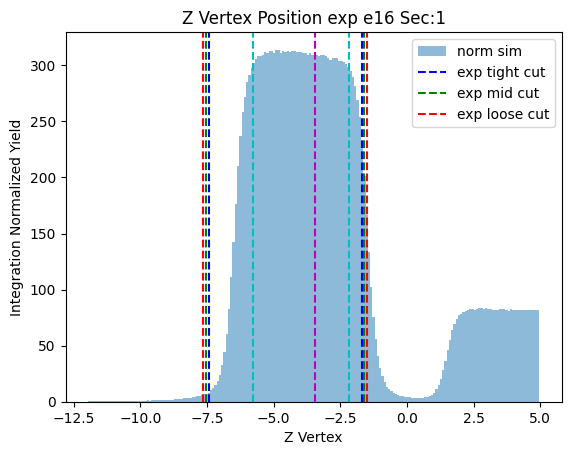

[-5.618430406142449, -2.3363920110465344]


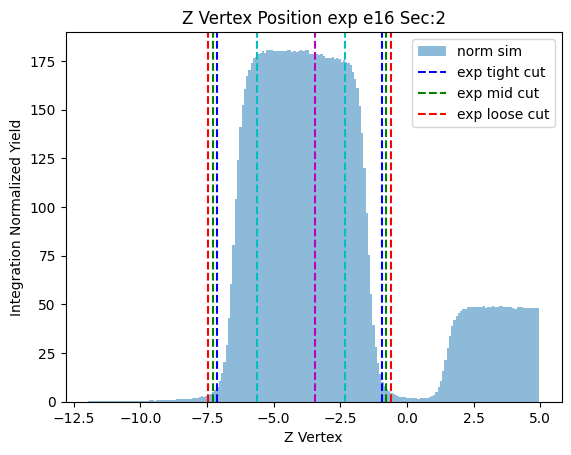

[-5.557212394709124, -2.387314174876098]


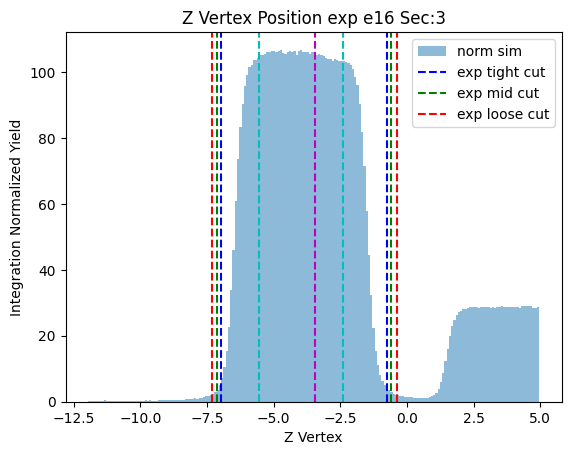

[-5.707649466291195, -2.240424279728604]


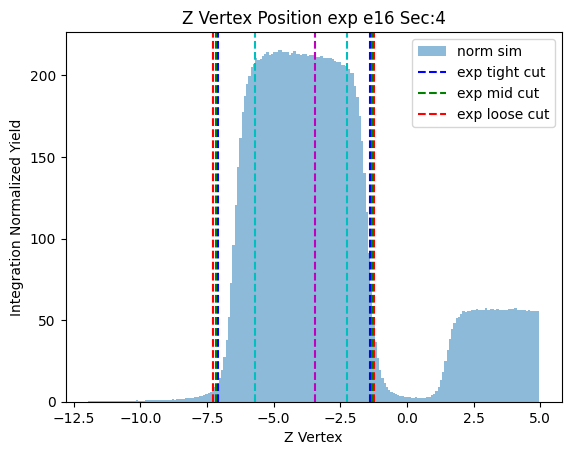

[-5.88278855875817, -2.1393332730705445]


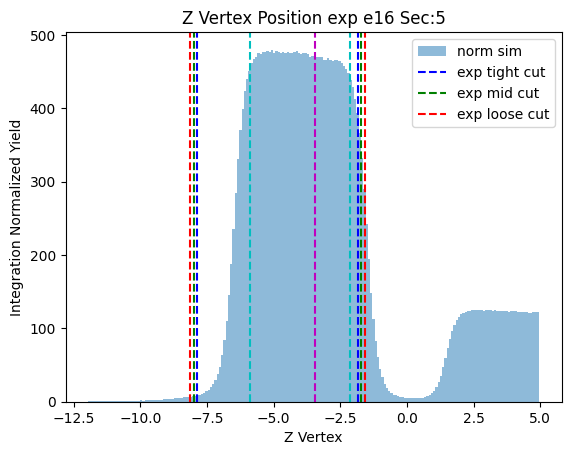

[-5.605008889441303, -2.340588495790545]


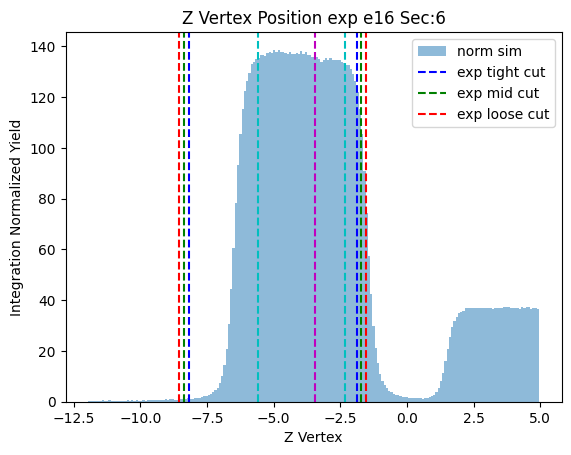

In [20]:
for sec in range(6):
    #plt.hist(xvals,weights=yvals_f[sec],label="exp",bins=len(xvals))
    plt.hist(xvals,weights=yvals_s[sec],label="norm sim",bins=len(xvals),alpha =0.5)
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    plt.axvline(x=int_range_s[sec][0],color='c',linestyle="dashed")
    plt.axvline(x=int_range_s[sec][1],color='c',linestyle="dashed")
    plt.axvline(x=xvals[100],color='m',linestyle="dashed")
    print(int_range_s[sec])
    for j in range(2):
        for k in range(3):
            if j == 0:
                plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed",label="exp {} cut".format(cut_name[k]))
            else:
                plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed")
    plt.title("Z Vertex Position {} {} Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Integration Normalized Yield")
    plt.legend()
    plt.show()

In [21]:
for sec in range(6):
    print("** Sector ",sec+1," **")
    print("Bounds:",int_range_s[sec][0],"   ",int_range_s[sec][1])
    print(int_exp[sec])
    print(int_sim[sec])
    print(int_exp[sec]/int_sim[sec])
    print(yvals_f[sec][100],yvals_s[sec][100]*int_exp[sec]/int_sim[sec])

** Sector  1  **
Bounds: -5.767627680760852     -2.1912756462162184
53831356.0
21930.313626348972
2454.6550914494155
841476.0 760488.823329954
** Sector  2  **
Bounds: -5.618430406142449     -2.3363920110465344
46179423.0
12679.666306644678
3642.0061761246857
717545.0 652664.6120090566
** Sector  3  **
Bounds: -5.557212394709124     -2.387314174876098
48931226.0
7458.094218298793
6560.82164796804
769005.0 688176.3916538052
** Sector  4  **
Bounds: -5.707649466291195     -2.240424279728604
50868114.0
14981.23050764203
3395.456332779328
799529.0 720382.6703351443
** Sector  5  **
Bounds: -5.88278855875817     -2.1393332730705445
53013774.0
33485.96624073386
1583.1639325823492
824295.0 742689.1698328262
** Sector  6  **
Bounds: -5.605008889441303     -2.340588495790545
48914431.0
9646.029800400138
5070.939237402203
757087.0 687709.1481572154


[-5.767627680760852, -2.1912756462162184]


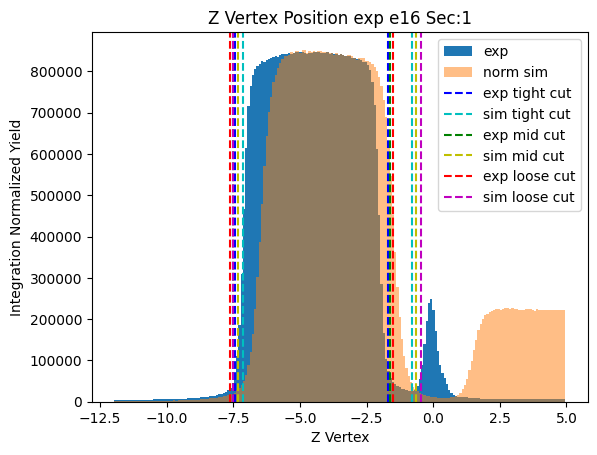

[-5.618430406142449, -2.3363920110465344]


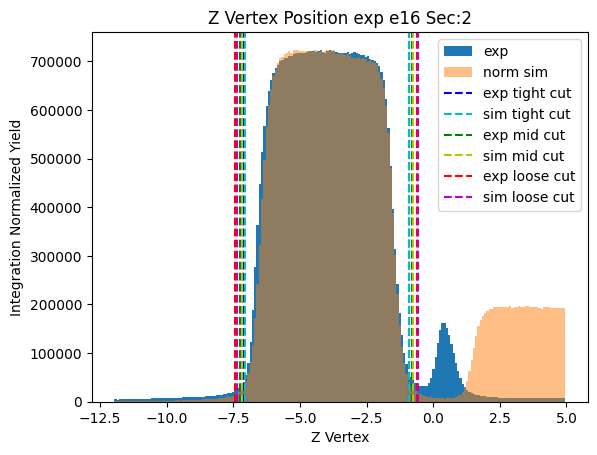

[-5.557212394709124, -2.387314174876098]


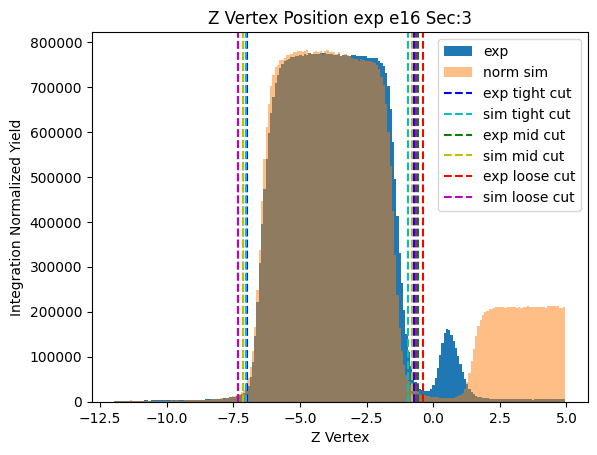

[-5.707649466291195, -2.240424279728604]


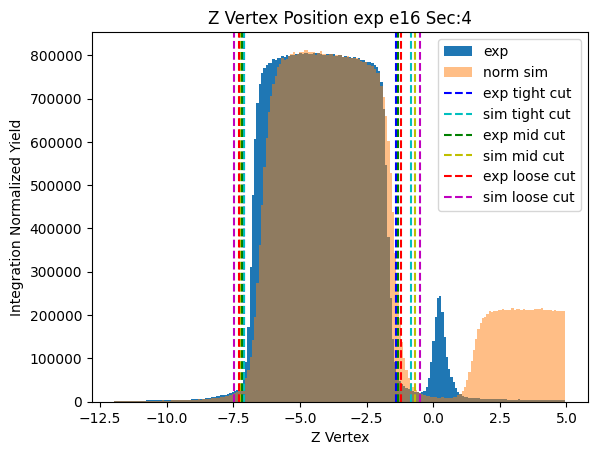

[-5.88278855875817, -2.1393332730705445]


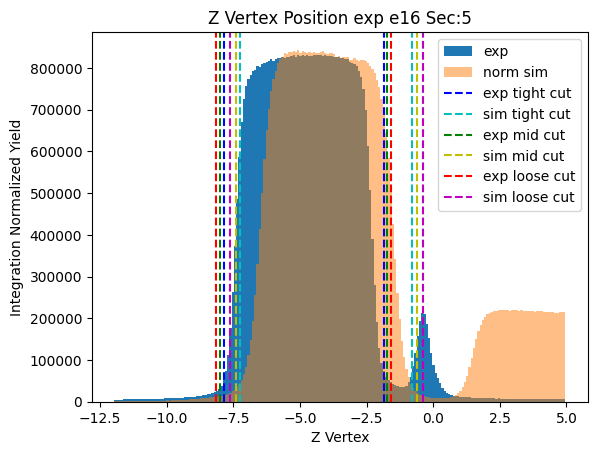

[-5.605008889441303, -2.340588495790545]


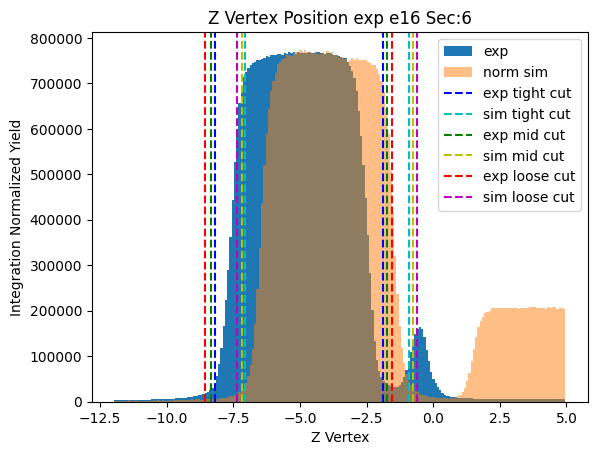

In [22]:
s_color_order=['c','y','m']

for sec in range(6):
    plt.hist(xvals,weights=yvals_f[sec],label="exp",bins=len(xvals))
    plt.hist(xvals,weights=yvals_seq[sec],label="norm sim",bins=len(xvals),alpha =0.5)
    #plt.scatter(xvals,yvals_eq[sec],label="norm empty target")
    #plt.scatter(xvals,yvals_f,label="filled target")
    #plt.axvline(x=int_range_s[sec][0],color='c',linestyle="dashed")
    #plt.axvline(x=int_range_s[sec][1],color='c',linestyle="dashed")
    #plt.axvline(x=xvals[100],color='m',linestyle="dashed")
    print(int_range_s[sec])
    for j in range(2):
        for k in range(3):
            if j == 0:
                plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed",label="exp {} cut".format(cut_name[k]))
                plt.axvline(x=cut_edges_s[sec][j][k],color=s_color_order[k],linestyle="dashed",label="sim {} cut".format(cut_name[k]))
            else:
                plt.axvline(x=cut_edges[sec][j][k],color=color_order[k],linestyle="dashed")
                plt.axvline(x=cut_edges_s[sec][j][k],color=s_color_order[k],linestyle="dashed")
    plt.title("Z Vertex Position {} {} Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Integration Normalized Yield")
    plt.legend()
    plt.show()

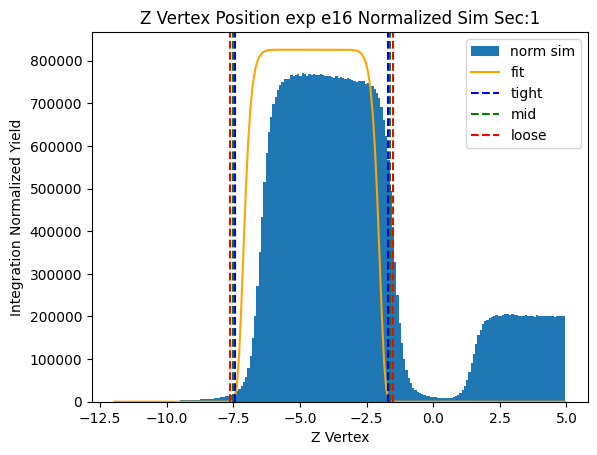

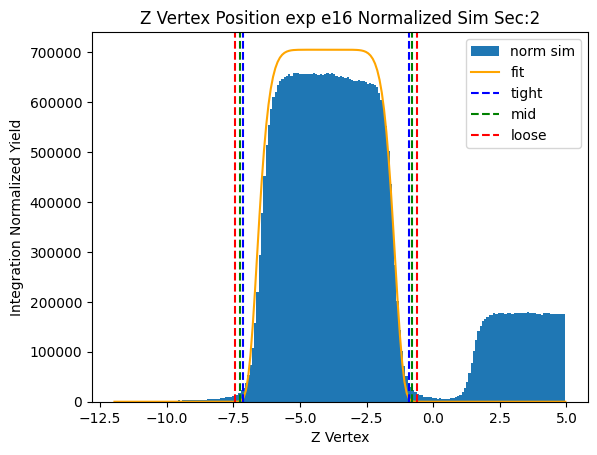

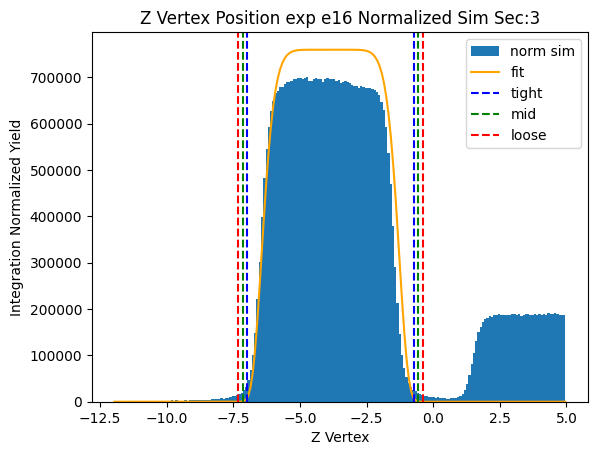

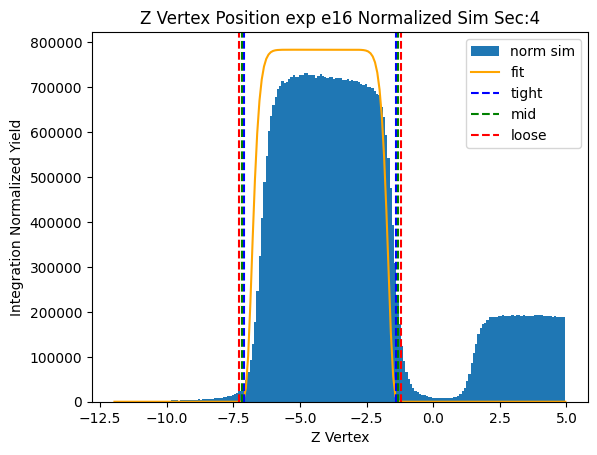

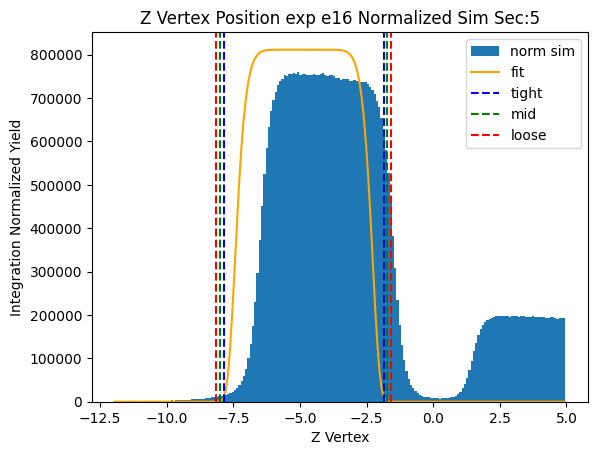

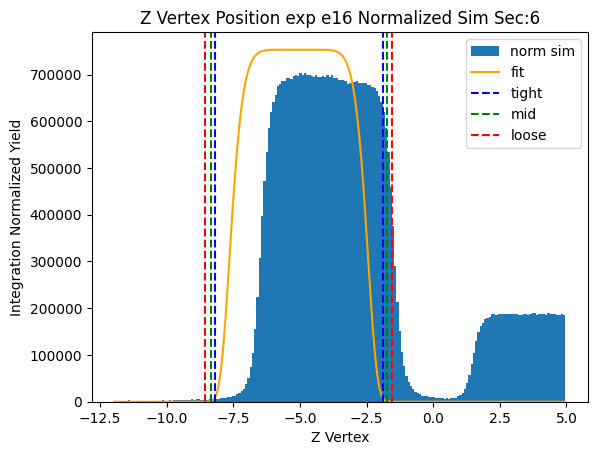

In [23]:
ini_pars = [600000,-5.0,5.0,10.0]

sim_cut_edges = np.zeros((6,2,3))

sim_fit_pars = np.zeros((6,4))

for sec in range(6):
    plt.hist(xvals,weights=yvals_sq[sec],label="norm sim",bins=len(xvals))
    #plt.scatter(xvals,yvals_sub[sec],label="Subtracted Data")
    #plt.scatter(xvals,yvals_f,label="filled target")
    try:
        pars, pars_cov = op.curve_fit(Super_Gaus,xvals,yvals_sub[sec],p0=ini_pars,maxfev=5000)
        cont_x = np.linspace(xvals[0],xvals[xbins-1],200)
        plt.plot(cont_x,Super_Gaus(cont_x,*pars),label="fit",color='orange')
        for i in range(4):
            sim_fit_pars[sec][i] = pars[i]
        for j in range(2):
            for k in range(3):
                sim_cut_edges[sec][j][k] = super_gaus_cut_bound(gaus_fracs[k],j,*pars)
                if j == 0:
                    plt.axvline(x=sim_cut_edges[sec][j][k],color=color_order[k],linestyle="dashed",label=cut_name[k])
                else:
                    plt.axvline(x=sim_cut_edges[sec][j][k],color=color_order[k],linestyle="dashed")
    except RuntimeError:
        print("Runtime Error")
    except ValueError:
        print("Value Error") 
    plt.title("Z Vertex Position {} {} Normalized Sim Sec:{}".format(sim,run,sec+1))
    plt.xlabel("Z Vertex")
    plt.ylabel("Integration Normalized Yield")
    plt.legend()
    plt.show()

In [24]:
fin_cut_pars = np.zeros((2,6,3,2))

for sec in range(6):
    for cut in range(3):
        for side in range(2):
            fin_cut_pars[0][sec][cut][side] = cut_edges[sec][side][cut]
            fin_cut_pars[1][sec][cut][side] = cut_edges_s[sec][side][cut]
            #fin_cut_pars[1][sec][cut][side] = sim_cut_edges[sec][side][cut]

In [25]:
all_one_line=True

print(run+" Vertex Cut Parameters")
print("[exp/sim][sec][tight,mid,loose][bot,top]")
for stat in range(2):
    for sec in range(6):
        for cut in range(3):
            for side in range(2):
                if side ==0:
                    if cut==0:
                        if sec ==0:
                            if stat == 0:
                                if all_one_line:
                                    print("\t{{{{",fin_cut_pars[stat][sec][cut][side],end=",")
                                else:
                                    print("{\t{\t{\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                            else:
                                if all_one_line:
                                    print("{{{",fin_cut_pars[stat][sec][cut][side],end=",")
                                else:
                                    print("\t{\t{\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                        else:
                            if all_one_line:
                                print("{{",fin_cut_pars[stat][sec][cut][side],end=",")
                            else:
                                print("\t\t{\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                    else:
                        if all_one_line:
                            print("{",fin_cut_pars[stat][sec][cut][side],end=",")
                        else:
                            print("\t\t\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                elif side ==1:
                    if cut ==2:
                        if sec ==5:
                            if stat ==1:
                                print(fin_cut_pars[stat][sec][cut][side],"}}}}")
                            else:
                                if all_one_line:
                                    print(fin_cut_pars[stat][sec][cut][side],end="}}},")
                                else:
                                    print(fin_cut_pars[stat][sec][cut][side],"}}},")
                        else:
                            if all_one_line:
                                print(fin_cut_pars[stat][sec][cut][side],end="}},")
                            else:
                                print(fin_cut_pars[stat][sec][cut][side],"}},")
                    else:
                        if all_one_line:
                            print(fin_cut_pars[stat][sec][cut][side],end="},")
                        else:
                            print(fin_cut_pars[stat][sec][cut][side],"},")
                else:
                    if all_one_line:
                        print(fin_cut_pars[stat][sec][cut][side],end="},")
                    else:
                        print(fin_cut_pars[stat][sec][cut][side],end="},")
                                
                                
                                
                                

e16 Vertex Cut Parameters
[exp/sim][sec][tight,mid,loose][bot,top]
	{{{{ -7.444302065389424,-1.6955991162976152},{ -7.5280976108155055,-1.6118035708715333},{ -7.637153778062926,-1.5027474036241126}},{{ -7.124195877023778,-0.9202414720815288},{ -7.2658889967734375,-0.7785483523318693},{ -7.4536509359789935,-0.5907864131263136}},{{ -6.9831751941710385,-0.7310793883903424},{ -7.132521408857991,-0.5817331737033902},{ -7.330873967110241,-0.3833806154511401}},{{ -7.092327719425328,-1.397748181662478},{ -7.170366324230932,-1.3197095768568738},{ -7.27173531372989,-1.218340587357916}},{{ -7.865441426473583,-1.839281076843684},{ -7.983948021512907,-1.7207744818043604},{ -8.139906152675765,-1.564816350641502}},{{ -8.194206846971579,-1.8909271757712656},{ -8.347995397067406,-1.7371386256754389},{ -8.552473491830902,-1.532660530911941}}},{{{ -7.149401817385057,-0.8095015095920144},{ -7.307364689890879,-0.6515386370861913},{ -7.517627680760852,-0.4412756462162184}},{{ -7.057130257023456,-0.897692160

In [ ]:
# from PIL import Image
# import glob
# import os
# images = glob.glob("*.png")
# print(images)
# imlist = []
# for img in images:
#     im = Image.open(img)
#     im = im.convert('RGB')
#     imlist.append(im)
# imlist[0].save('plots.pdf',save_all=True, append_images=imlist[1:])
# map(os.remove(img),[img for img in images])

In [ ]:
all_one_line=True

print(run+" Vertex Cut Parameters")
print("[exp/sim][sec][tight,mid,loose][bot,top]")
for stat in range(2):
    for sec in range(6):
        for cut in range(3):
            for side in range(2):
                if side ==0:
                    if cut==0:
                        if sec ==0:
                            if stat == 0:
                                if all_one_line:
                                    print("\t{{{{",fin_cut_pars[stat][sec][cut][side],end=",")
                                else:
                                    print("{\t{\t{\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                            else:
                                if all_one_line:
                                    print("{{{",fin_cut_pars[stat][sec][cut][side],end=",")
                                else:
                                    print("\t{\t{\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                        else:
                            if all_one_line:
                                print("{{",fin_cut_pars[stat][sec][cut][side],end=",")
                            else:
                                print("\t\t{\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                    else:
                        if all_one_line:
                            print("{",fin_cut_pars[stat][sec][cut][side],end=",")
                        else:
                            print("\t\t\t{",fin_cut_pars[stat][sec][cut][side],end=",")
                elif side ==1:
                    if cut ==2:
                        if sec ==5:
                            if stat ==1:
                                print(fin_cut_pars[stat][sec][cut][side],"}}}}")
                            else:
                                if all_one_line:
                                    print(fin_cut_pars[stat][sec][cut][side],end="}}},")
                                else:
                                    print(fin_cut_pars[stat][sec][cut][side],"}}},")
                        else:
                            if all_one_line:
                                print(fin_cut_pars[stat][sec][cut][side],end="}},")
                            else:
                                print(fin_cut_pars[stat][sec][cut][side],"}},")
                    else:
                        if all_one_line:
                            print(fin_cut_pars[stat][sec][cut][side],end="},")
                        else:
                            print(fin_cut_pars[stat][sec][cut][side],"},")
                else:
                    if all_one_line:
                        print(fin_cut_pars[stat][sec][cut][side],end="},")
                    else:
                        print(fin_cut_pars[stat][sec][cut][side],end="},")
                                